<a href="https://colab.research.google.com/github/sabaahmedd/123/blob/main/MiningAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [ ]:
dataTrain = pd.read_csv('save_the_bees.csv')
dataTrain.head()

,state,state_code,num_colonies,max_colonies,lost_colonies,percent_lost,added_colonies,renovated_colonies,percent_renovated,quarter,year,varroa_mites,other_pests_and_parasites,diseases,pesticides,other,unknown
0,Alabama,AL,7000,7000,1800,26,2800,250,4,1,2015,10.0,5.4,0.0,2.2,9.1,9.4
1,Arizona,AZ,35000,35000,4600,13,3400,2100,6,1,2015,26.9,20.5,0.1,0.0,1.8,3.1
2,Arkansas,AR,13000,14000,1500,11,1200,90,1,1,2015,17.6,11.4,1.5,3.4,1.0,1.0
3,California,CA,1440000,1690000,255000,15,250000,124000,7,1,2015,24.7,7.2,3.0,7.5,6.5,2.8
4,Colorado,CO,3500,12500,1500,12,200,140,1,1,2015,14.6,0.9,1.8,0.6,2.6,5.9


In [ ]:
type(dataTrain)

pandas.core.frame.DataFrame

In [ ]:
dataTrain.shape

(1453, 17)

In [ ]:
dataTrain.isnull().sum()

state                        0
state_code                   0
num_colonies                 0
max_colonies                 0
lost_colonies                0
percent_lost                 0
added_colonies               0
renovated_colonies           0
percent_renovated            0
quarter                      0
year                         0
varroa_mites                 0
other_pests_and_parasites    0
diseases                     0
pesticides                   0
other                        0
unknown                      0
dtype: int64

In [ ]:
dataTrain = dataTrain.dropna()

In [ ]:
dataTrain.isnull().sum()

state                        0
state_code                   0
num_colonies                 0
max_colonies                 0
lost_colonies                0
percent_lost                 0
added_colonies               0
renovated_colonies           0
percent_renovated            0
quarter                      0
year                         0
varroa_mites                 0
other_pests_and_parasites    0
diseases                     0
pesticides                   0
other                        0
unknown                      0
dtype: int64

In [ ]:
dataTrain.shape

(1453, 17)

In [ ]:
dataTrain.dtypes

state                         object
state_code                    object
num_colonies                   int64
max_colonies                   int64
lost_colonies                  int64
percent_lost                   int64
added_colonies                 int64
renovated_colonies             int64
percent_renovated              int64
quarter                        int64
year                           int64
varroa_mites                 float64
other_pests_and_parasites    float64
diseases                     float64
pesticides                   float64
other                        float64
unknown                      float64
dtype: object

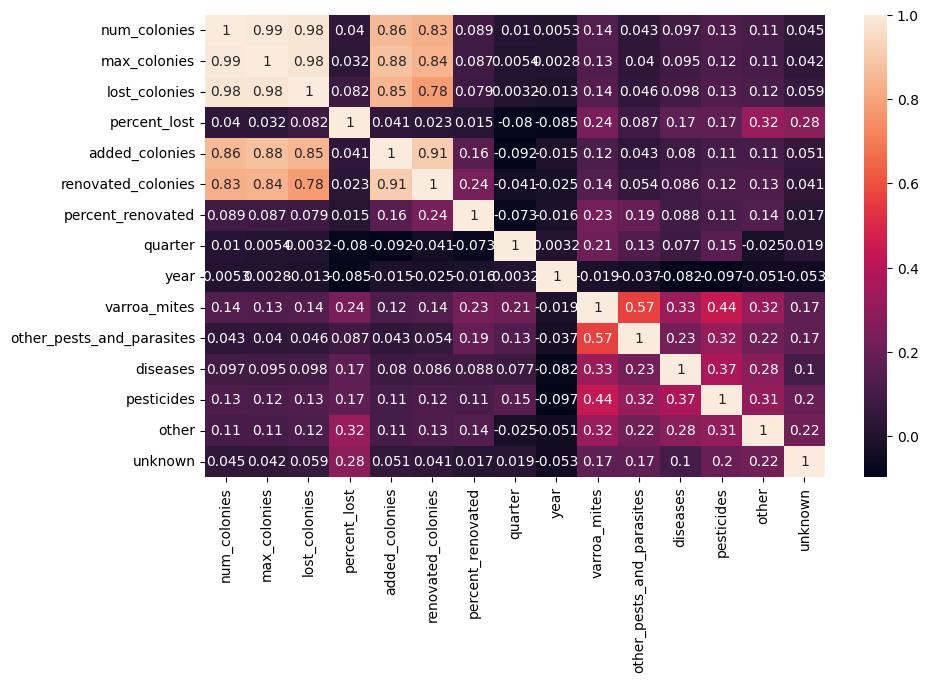

In [ ]:
plt.figure(figsize=(10,6))
corr = dataTrain.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
dataTrain.describe()

,num_colonies,max_colonies,lost_colonies,percent_lost,added_colonies,renovated_colonies,percent_renovated,quarter,year,varroa_mites,other_pests_and_parasites,diseases,pesticides,other,unknown
count,1.453000e+03,1.453000e+03,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,1.244700e+05,1.559487e+05,16759.710943,11.266345,15744.900206,13520.302822,7.112870,2.516173,2018.474191,30.186098,10.937509,3.406676,6.185272,6.083345,3.994907
std,4.384997e+05,5.505931e+05,60681.042329,7.359984,63548.439090,57201.973644,9.025198,1.132682,2.322824,18.861293,13.035092,6.472063,8.959392,6.488208,4.939563
min,1.300000e+03,1.300000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000e+03,9.500000e+03,950.000000,6.000000,380.000000,150.000000,1.000000,1.000000,2016.000000,15.600000,1.900000,0.100000,0.400000,1.800000,0.800000
50%,1.850000e+04,2.300000e+04,2200.000000,10.000000,1500.000000,800.000000,4.000000,3.000000,2018.000000,27.200000,7.000000,1.100000,2.600000,4.100000,2.400000
75%,5.900000e+04,7.900000e+04,7000.000000,14.000000,6000.000000,3700.000000,10.000000,4.000000,2021.000000,42.200000,15.100000,4.200000,8.500000,8.200000,5.400000
max,3.181180e+06,4.174440e+06,502350.000000,65.000000,736920.000000,762550.000000,77.000000,4.000000,2022.000000,98.800000,91.900000,87.400000,73.500000,61.400000,46.200000


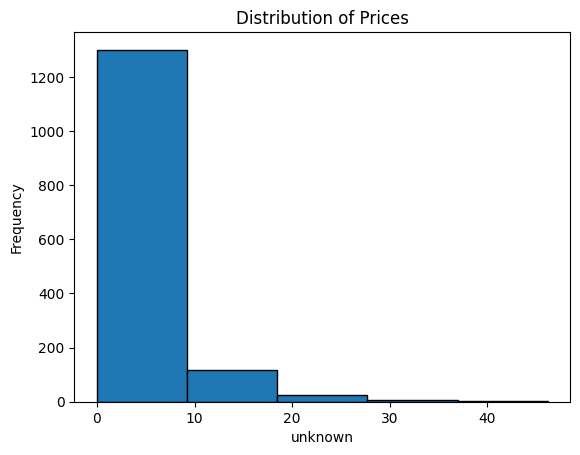

In [ ]:
dataTrain['unknown'].plot(kind = 'hist', bins = 5, edgecolor='black')
plt.xlabel('unknown')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

In [ ]:
dataTrain.describe(include = 'object')

,state,state_code
count,1453,1453
unique,47,47
top,Alabama,AL
freq,31,31


<Axes: xlabel='lost_colonies', ylabel='unknown'>

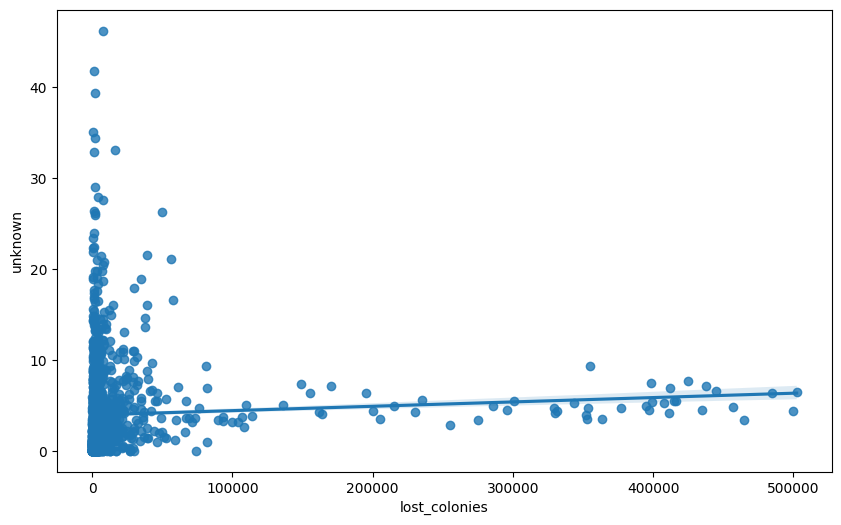

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="lost_colonies", y="unknown", data=dataTrain)

In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['lost_colonies'], dataTrain['unknown'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.05887487663075993  with a P-value of P = 0.024818126561847013


<Axes: xlabel='percent_lost', ylabel='unknown'>

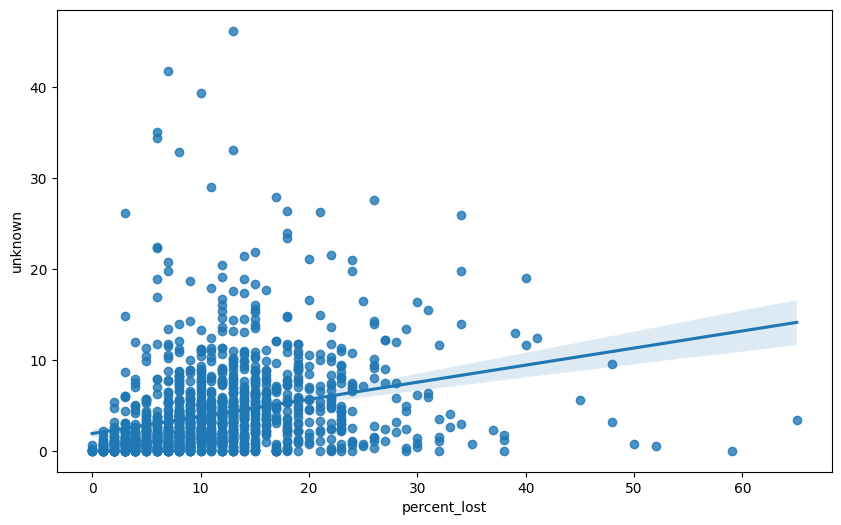

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="percent_lost", y="unknown", data=dataTrain)

In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['percent_lost'], dataTrain['unknown'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.2802621472152367  with a P-value of P = 1.2455777914867567e-27


<Axes: xlabel='added_colonies', ylabel='unknown'>

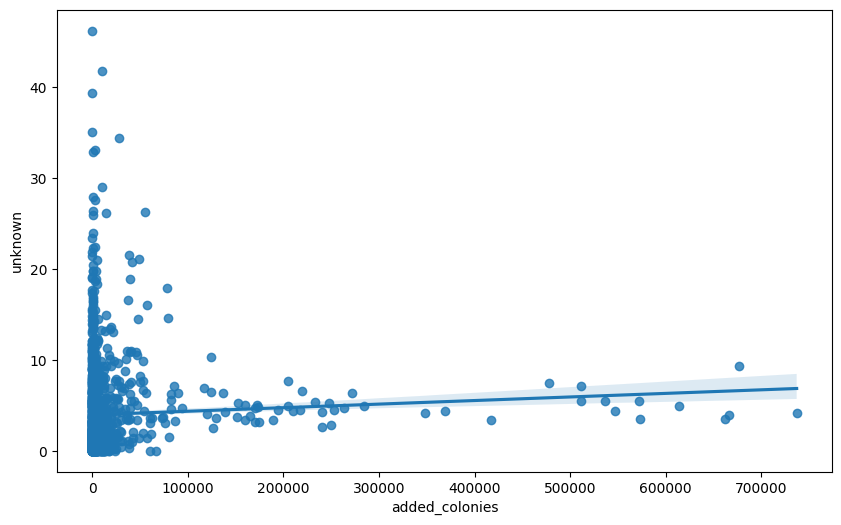

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="added_colonies", y="unknown", data=dataTrain)

In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['added_colonies'], dataTrain['unknown'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.05057293403891775  with a P-value of P = 0.053939096978767136


<Axes: xlabel='renovated_colonies', ylabel='unknown'>

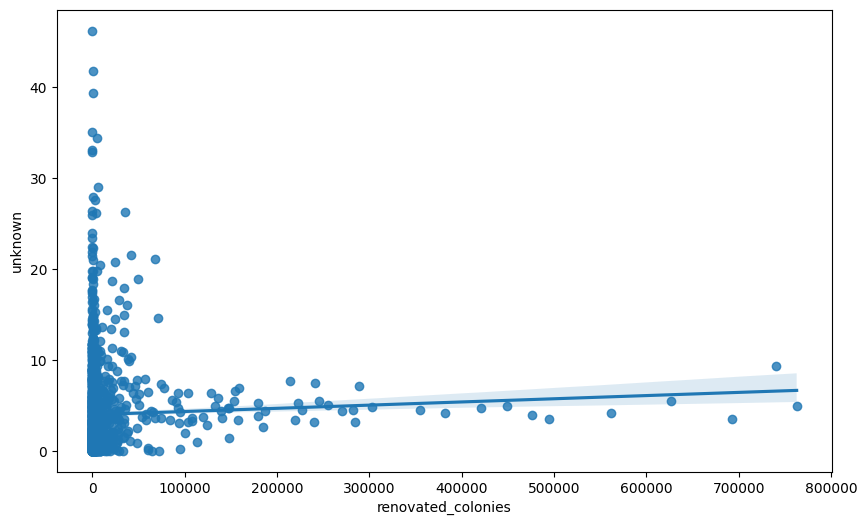

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="renovated_colonies", y="unknown", data=dataTrain)

In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['renovated_colonies'], dataTrain['unknown'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.040599616081481486  with a P-value of P = 0.12188936674919153


<Axes: xlabel='percent_renovated', ylabel='unknown'>

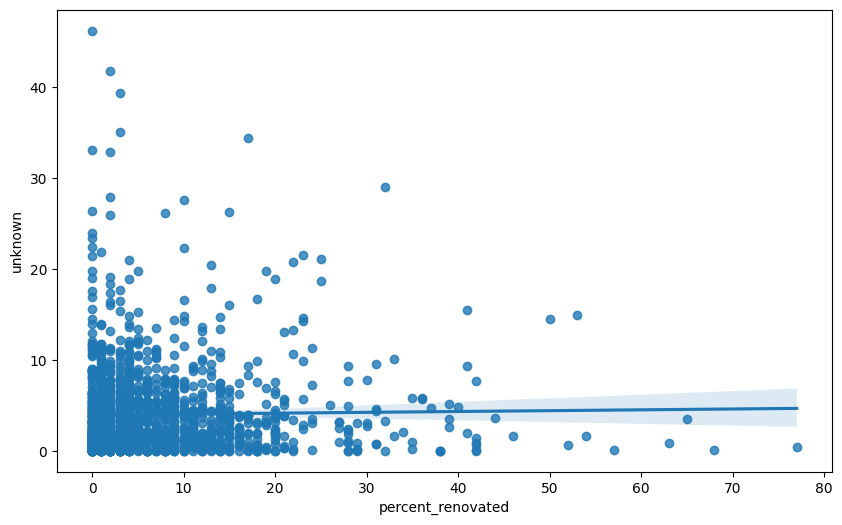

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="percent_renovated", y="unknown", data=dataTrain)

In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['quarter'], dataTrain['unknown'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.01897120781844611  with a P-value of P = 0.46993079284900025


<Axes: xlabel='year', ylabel='unknown'>

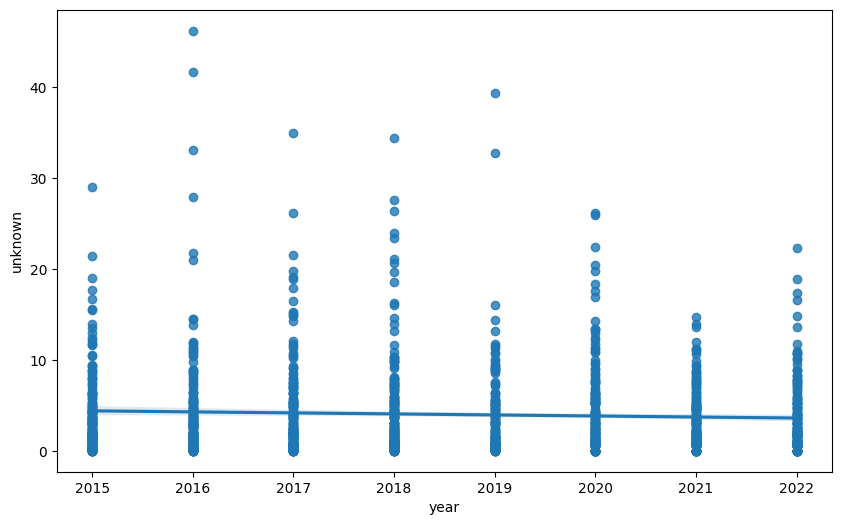

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="year", y="unknown", data=dataTrain)

In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['year'], dataTrain['unknown'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.05307912207753519  with a P-value of P = 0.04307650954081781


<Axes: xlabel='varroa_mites', ylabel='unknown'>

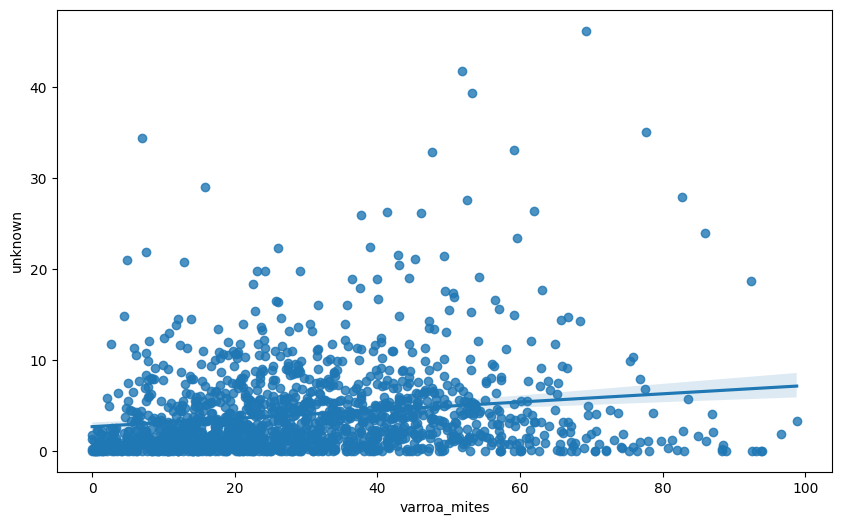

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="varroa_mites", y="unknown", data=dataTrain)

In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['varroa_mites'], dataTrain['unknown'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.17251338932105603  with a P-value of P = 3.59349619262914e-11


<Axes: xlabel='other_pests_and_parasites', ylabel='unknown'>

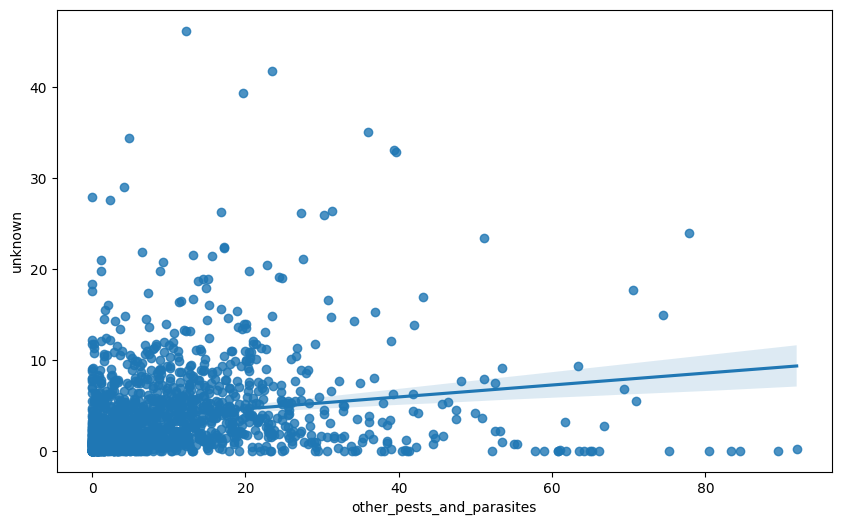

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="other_pests_and_parasites", y="unknown", data=dataTrain)

In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['other_pests_and_parasites'], dataTrain['unknown'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.17311620749997783  with a P-value of P = 3.0647624554295264e-11


<Axes: xlabel='diseases', ylabel='unknown'>

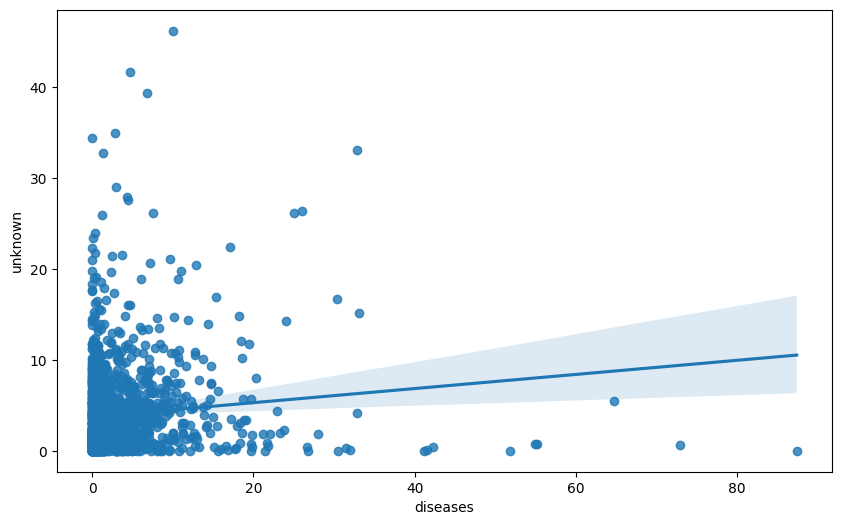

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="diseases", y="unknown", data=dataTrain)

In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['diseases'], dataTrain['unknown'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.10178604963180499  with a P-value of P = 0.00010163142830347594


<Axes: xlabel='pesticides', ylabel='unknown'>

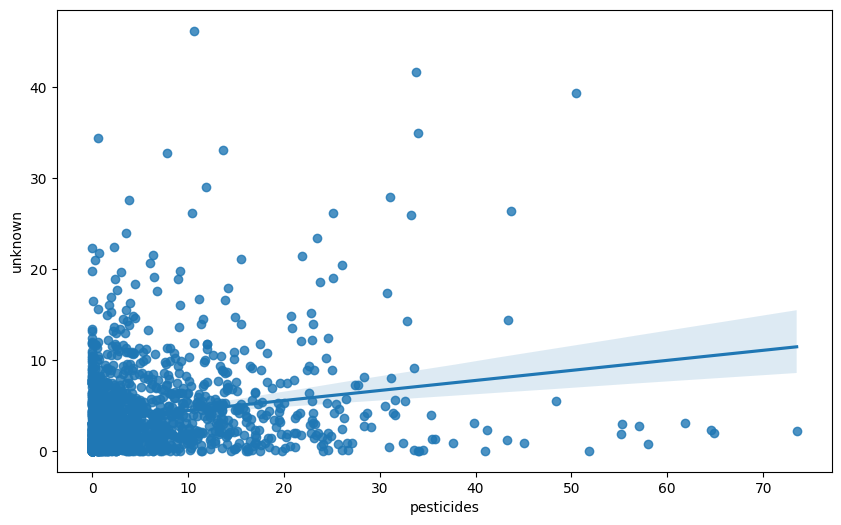

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="pesticides", y="unknown", data=dataTrain)

In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['pesticides'], dataTrain['unknown'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.20037097529273046  with a P-value of P = 1.2628468103724078e-14


<Axes: xlabel='other', ylabel='unknown'>

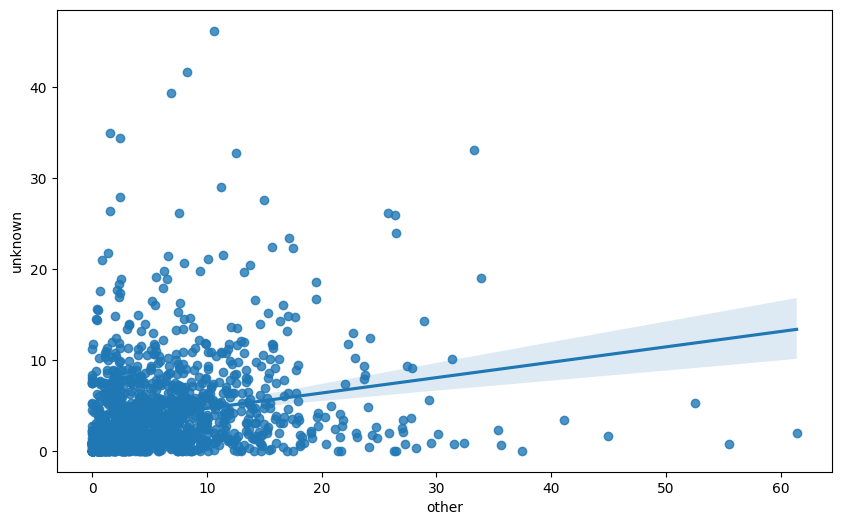

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="other", y="unknown", data=dataTrain)

In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['other'], dataTrain['unknown'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.22219257672133563  with a P-value of P = 1.0380835911151134e-17


<Axes: xlabel='num_colonies', ylabel='unknown'>

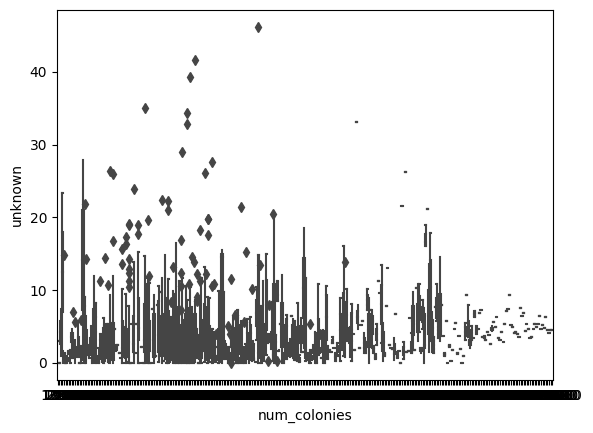

In [ ]:
sns.boxplot(x="num_colonies", y="unknown", data=dataTrain)

<Axes: xlabel='max_colonies', ylabel='unknown'>

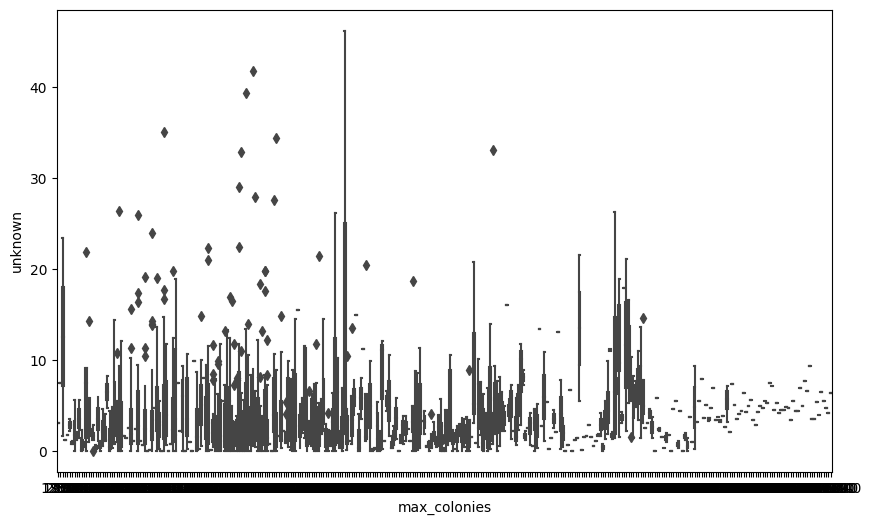

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="max_colonies", y="unknown", data=dataTrain)

<Axes: xlabel='lost_colonies', ylabel='unknown'>

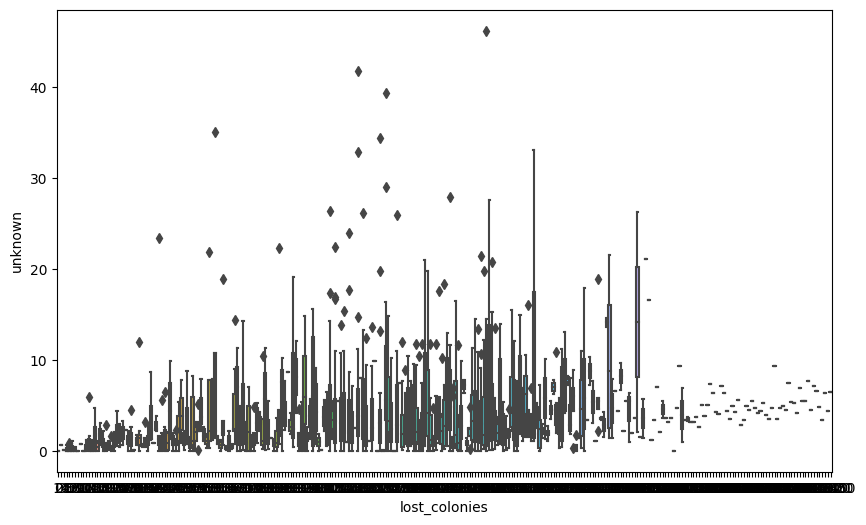

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="lost_colonies", y="unknown", data=dataTrain)

<Axes: xlabel='percent_lost', ylabel='unknown'>

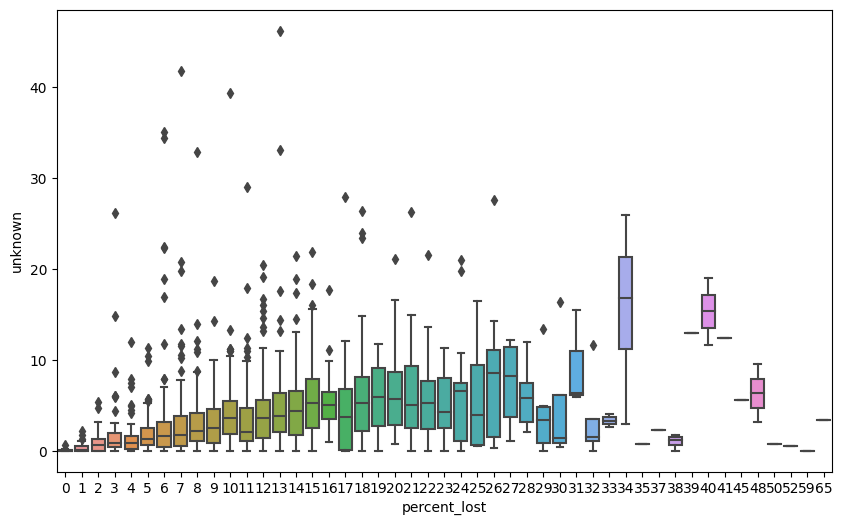

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="percent_lost", y="unknown", data=dataTrain)

<Axes: xlabel='added_colonies', ylabel='unknown'>

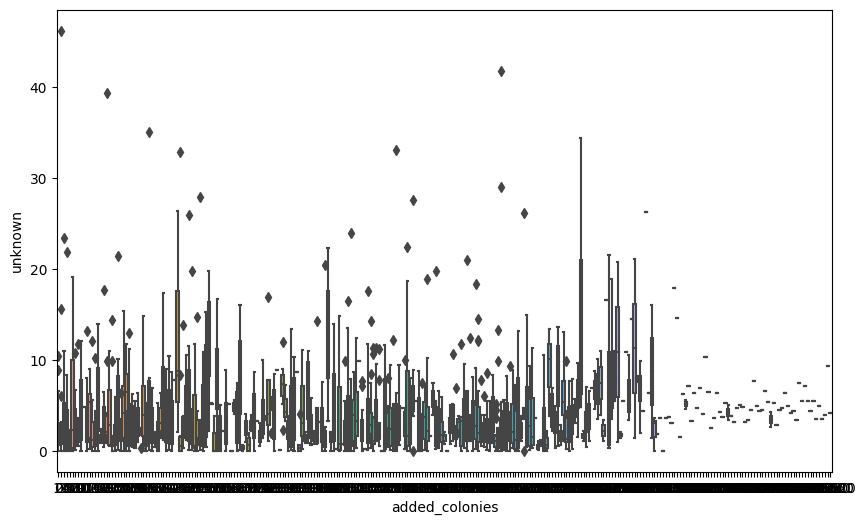

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="added_colonies", y="unknown", data=dataTrain)

<Axes: xlabel='renovated_colonies', ylabel='unknown'>

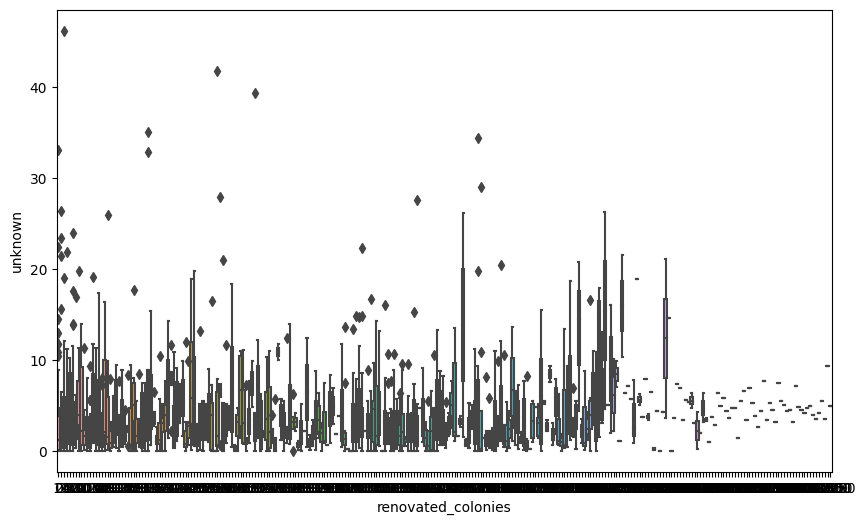

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="renovated_colonies", y="unknown", data=dataTrain)

<Axes: xlabel='percent_renovated', ylabel='unknown'>

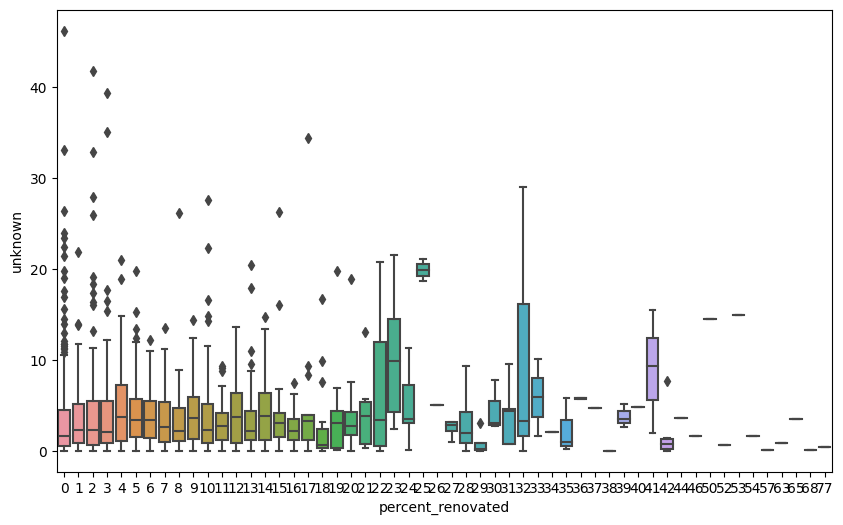

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="percent_renovated", y="unknown", data=dataTrain)

<Axes: xlabel='quarter', ylabel='unknown'>

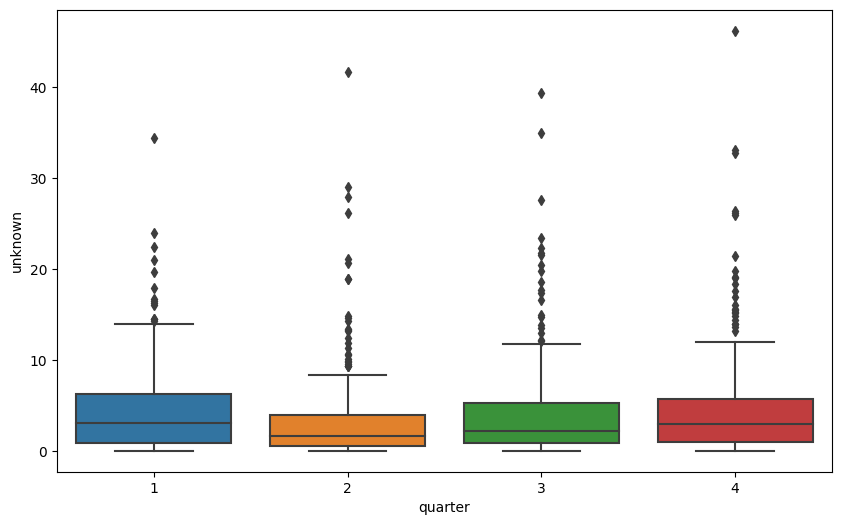

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="quarter", y="unknown", data=dataTrain)

<Axes: xlabel='year', ylabel='unknown'>

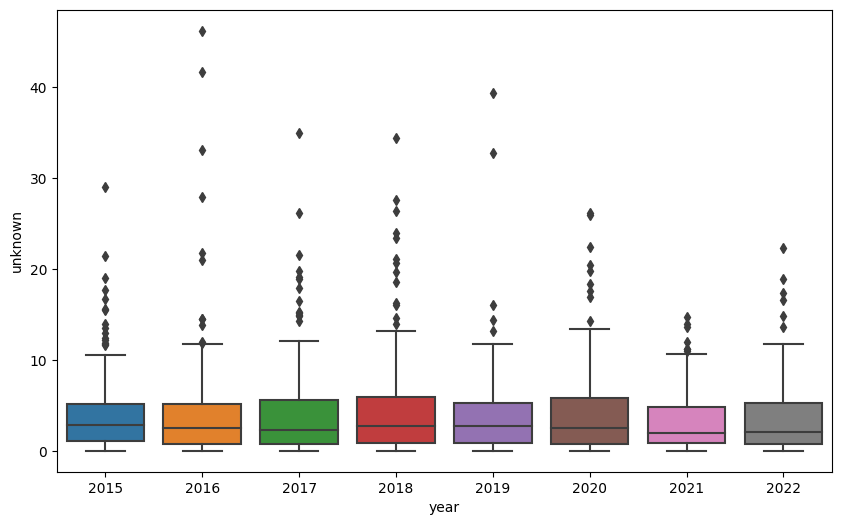

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="year", y="unknown", data=dataTrain)

<Axes: xlabel='varroa_mites', ylabel='unknown'>

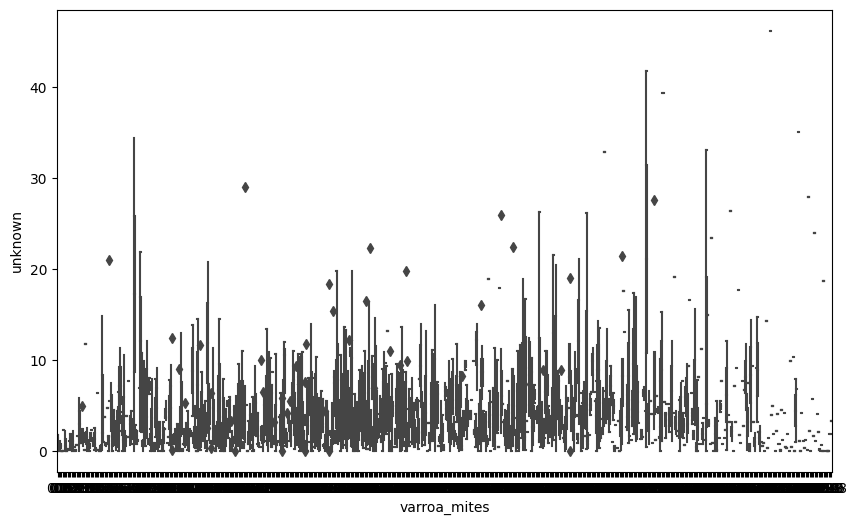

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="varroa_mites", y="unknown", data=dataTrain)

<Axes: xlabel='other_pests_and_parasites', ylabel='unknown'>

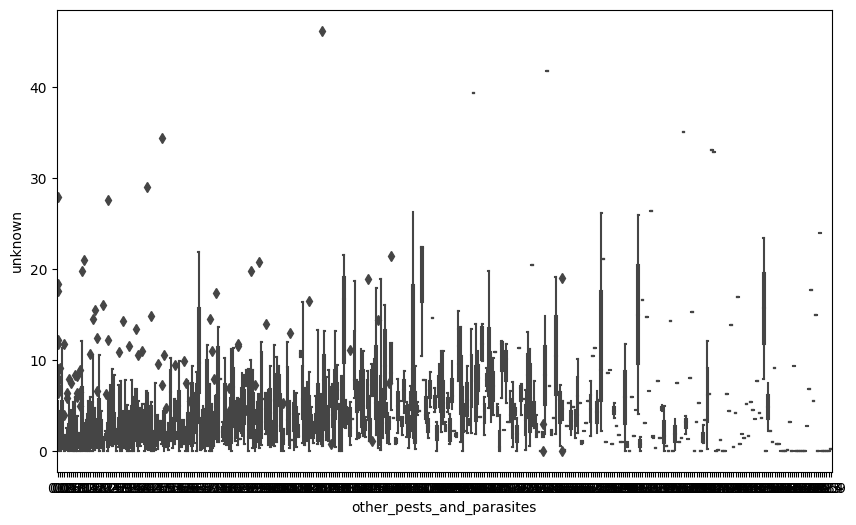

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="other_pests_and_parasites", y="unknown", data=dataTrain)

<Axes: xlabel='diseases', ylabel='unknown'>

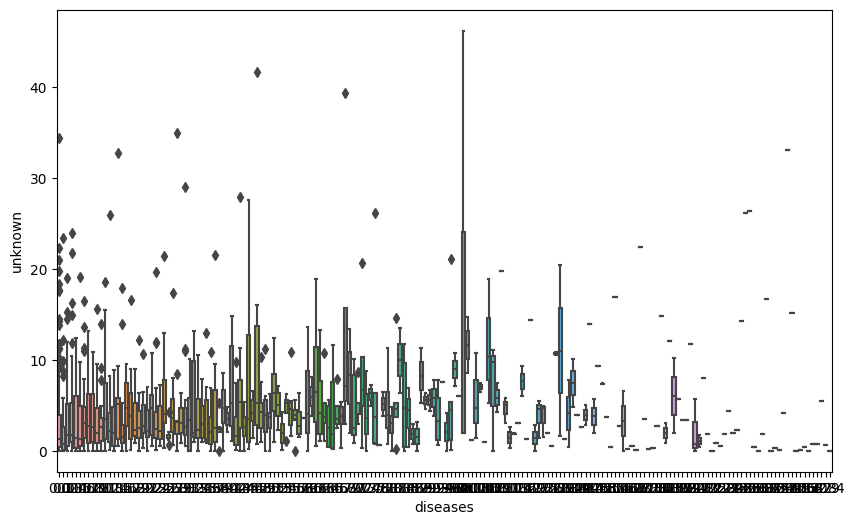

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="diseases", y="unknown", data=dataTrain)

<Axes: xlabel='pesticides', ylabel='unknown'>

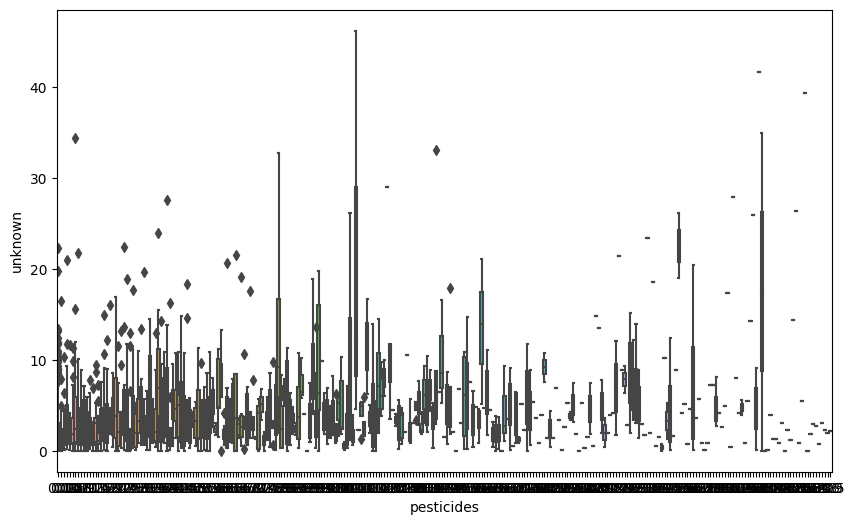

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="pesticides", y="unknown", data=dataTrain)

<Axes: xlabel='other', ylabel='unknown'>

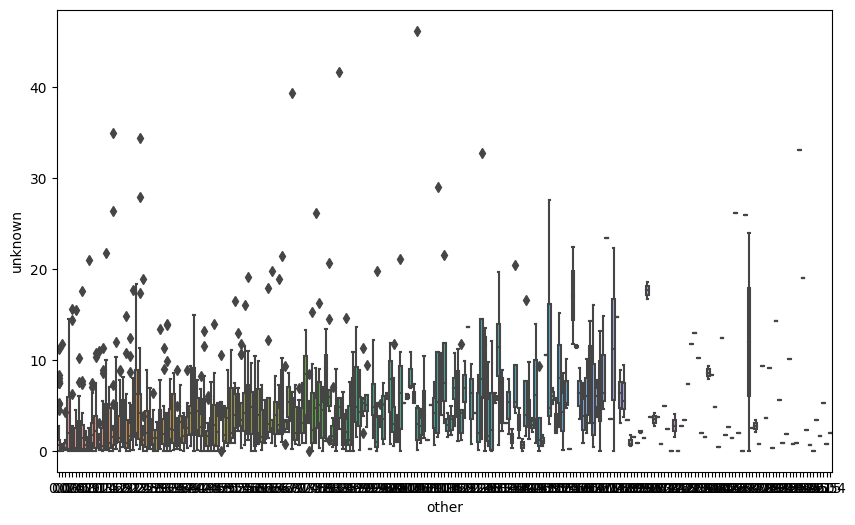

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="other", y="unknown", data=dataTrain)

In [ ]:
dataTrain.drop(['state','state_code','percent_lost','varroa_mites','other_pests_and_parasites','pesticides','other','num_colonies','max_colonies'], axis = 1, inplace = True)

In [ ]:
dataTrain.shape

(1453, 8)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

dataTrain.lost_colonies = labelencoder.fit_transform(dataTrain.lost_colonies)
dataTrain.added_colonies = labelencoder.fit_transform(dataTrain.added_colonies)
dataTrain.renovated_colonies = labelencoder.fit_transform(dataTrain.renovated_colonies)
dataTrain.percent_renovated = labelencoder.fit_transform(dataTrain.percent_renovated)
dataTrain.quarter = labelencoder.fit_transform(dataTrain.quarter)
dataTrain.year = labelencoder.fit_transform(dataTrain.year)
dataTrain.diseases = labelencoder.fit_transform(dataTrain.diseases)

In [ ]:
dataTrain.head(10)

,lost_colonies,added_colonies,renovated_colonies,percent_renovated,quarter,year,diseases,unknown
0,110,120,25,4,0,0,0,9.4
1,144,128,114,6,0,0,1,3.1
2,105,101,9,1,0,0,15,1.0
3,244,253,227,7,0,0,30,2.8
4,105,20,14,1,0,0,18,5.9
5,84,29,0,0,0,0,0,2.4
6,200,206,180,8,0,0,8,4.4
7,167,201,154,9,0,0,33,10.5
8,37,128,75,7,0,0,16,0.0
9,135,118,151,9,0,0,115,4.9


In [ ]:
import scipy.stats as stats
dataTrain= stats.zscore(dataTrain)

In [ ]:
dataTrain

,lost_colonies,added_colonies,renovated_colonies,percent_renovated,quarter,year,diseases,unknown
0,-0.149889,0.320697,-0.852030,-0.352708,-1.339030,-1.496191,-0.734004,1.094622
1,0.477851,0.443677,0.456778,-0.120920,-1.339030,-1.496191,-0.708693,-0.181234
2,-0.242204,0.028619,-1.087322,-0.700392,-1.339030,-1.496191,-0.354347,-0.606519
3,2.324144,2.365244,2.118523,-0.005025,-1.339030,-1.496191,0.025310,-0.241989
4,-0.242204,-1.216557,-1.013793,-0.700392,-1.339030,-1.496191,-0.278415,0.385813
...,...,...,...,...,...,...,...,...
1448,-0.352981,-1.524008,-0.896148,-0.468603,1.310463,1.518420,-0.531520,-0.707777
1449,0.274758,-1.308792,-0.660856,-0.700392,1.310463,1.518420,3.062568,1.560410
1450,0.219370,-0.555538,-1.219673,-0.816286,1.310463,1.518420,0.329036,0.689588
1451,-1.331517,0.013246,-1.028499,-0.816286,1.310463,1.518420,-0.734004,-0.667274


In [ ]:
dataTrain

,lost_colonies,added_colonies,renovated_colonies,percent_renovated,quarter,year,diseases,unknown
0,-0.149889,0.320697,-0.852030,-0.352708,-1.339030,-1.496191,-0.734004,1.094622
1,0.477851,0.443677,0.456778,-0.120920,-1.339030,-1.496191,-0.708693,-0.181234
2,-0.242204,0.028619,-1.087322,-0.700392,-1.339030,-1.496191,-0.354347,-0.606519
3,2.324144,2.365244,2.118523,-0.005025,-1.339030,-1.496191,0.025310,-0.241989
4,-0.242204,-1.216557,-1.013793,-0.700392,-1.339030,-1.496191,-0.278415,0.385813
...,...,...,...,...,...,...,...,...
1448,-0.352981,-1.524008,-0.896148,-0.468603,1.310463,1.518420,-0.531520,-0.707777
1449,0.274758,-1.308792,-0.660856,-0.700392,1.310463,1.518420,3.062568,1.560410
1450,0.219370,-0.555538,-1.219673,-0.816286,1.310463,1.518420,0.329036,0.689588
1451,-1.331517,0.013246,-1.028499,-0.816286,1.310463,1.518420,-0.734004,-0.667274


In [ ]:
from sklearn.model_selection import train_test_split
x = dataTrain.drop(['unknown'], axis=1)
y = dataTrain['unknown']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
dataTrain.shape

(1453, 8)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1017, 7)
(436, 7)
(1017,)
(436,)


In [ ]:
x_train.head()

,lost_colonies,added_colonies,renovated_colonies,percent_renovated,quarter,year,diseases
304,-1.017647,-0.801499,-0.969676,-0.700392,0.427298,-1.065532,-0.480899
1409,-0.500685,-1.354910,-1.175556,-0.816286,1.310463,1.518420,-0.734004
931,-0.352981,0.366814,-1.219673,-0.816286,-1.339030,0.657103,2.758842
378,0.274758,-0.862989,-0.881442,-0.700392,-1.339030,-0.634873,-0.708693
690,0.847109,0.366814,1.706763,4.051282,0.427298,-0.204215,1.037730


In [ ]:
y_train.head()

304    -0.667274
1409   -0.687526
931     3.727340
378    -0.606519
690    -0.647022
Name: unknown, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model_mlr = model.fit(x_train,y_train)

In [ ]:
y_pred1 = model_mlr.predict(x_test)

In [ ]:
y_test[0]

KeyError: ignored

In [ ]:
y_pred1[0]

0.1884601350335058

In [ ]:
mse1 = mean_squared_error(y_test, y_pred1)
print('The mean square error for Multiple Linear Regression: ', mse1)

The mean square error for Multiple Linear Regression:  0.6940554257215972


In [ ]:
mae1= mean_absolute_error(y_test, y_pred1)
print('The mean absolute error for Multiple Linear Regression: ',mae1)

The mean absolute error for Multiple Linear Regression:  0.5980329073238534


In [ ]:
rf = RandomForestRegressor()
model_rf = rf.fit(x_train,y_train)

In [ ]:
y_pred2 = model_rf.predict(x_test)

In [ ]:
mse2 = mean_squared_error(y_test, y_pred2)
print('The mean square error of price and predicted value is: ', mse2)

The mean square error of price and predicted value is:  0.7490064892463955


In [ ]:
mae2= mean_absolute_error(y_test, y_pred2)
print('The mean absolute error of price and predicted value is: ', mae2)

The mean absolute error of price and predicted value is:  0.6467177278799452


In [ ]:
LassoModel = Lasso()
model_lm = LassoModel.fit(x_train,y_train)

In [ ]:
y_pred3 = model_lm.predict(x_test)

In [ ]:
mae3= mean_absolute_error(y_test, y_pred3)
print('The mean absolute error of price and predicted value is: ', mae3)

The mean absolute error of price and predicted value is:  0.6278874190560456


In [ ]:
mse3 = mean_squared_error(y_test, y_pred3)
print('The mean square error of price and predicted value is: ', mse3)

The mean square error of price and predicted value is:  0.6920920134489802


In [ ]:
scores = [('MLR', mae1),
          ('Random Forest', mae2),
          ('LASSO', mae3)
         ]

In [ ]:
mae = pd.DataFrame(data = scores, columns=['Model', 'MAE Score'])
mae

,Model,MAE Score
0,MLR,0.598033
1,Random Forest,0.646718
2,LASSO,0.627887


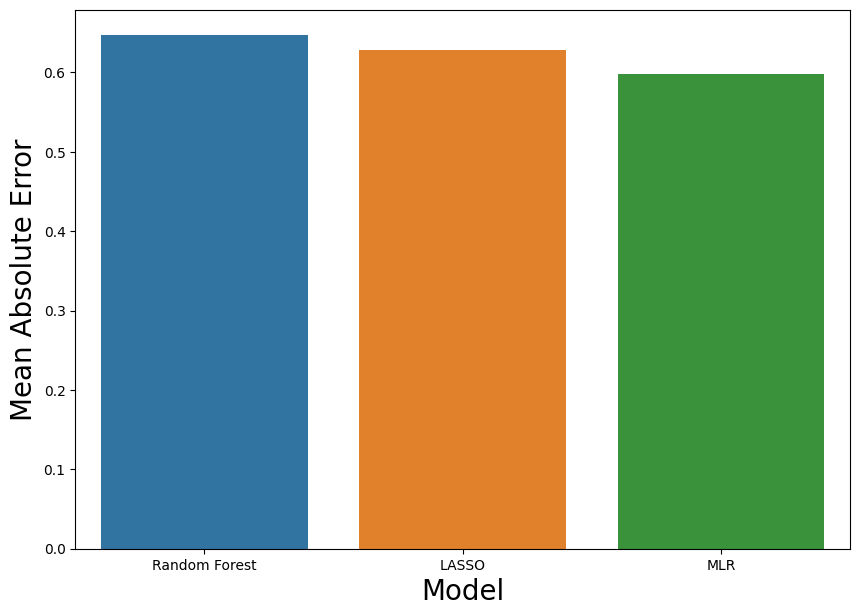

In [ ]:
mae.sort_values(by=(['MAE Score']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(10,7))
sns.barplot(x = mae['Model'], y=mae['MAE Score'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('Mean Absolute Error', size=20)

plt.show()